<a href="https://colab.research.google.com/github/JosueHuarauyaFabian/Trabajo-Parcial-Visi-n-Computacional/blob/main/Clasificacio%CC%81n_de_categorias_Dibujar_un_Objeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Montar Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Mon Jun  3 04:33:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###Definir las carpetas de Google Drive

In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
import zipfile

# Definir IDs de las carpetas
DRIVE_FOLDER_IDS = {
    "Animales": "1LxicGpnR4mwnvb6dDYLqKvFic3ZBCfGg",
    "Frutas": "1yt7IDii7CGhMEBWmZvUnWp0cG2omBAVQ",
    "Vehículos": "1L-SKX7ccMZqFXFFVQxjuYEZ7iZB0m22l",
    "Formas Geométricas": "1KnbPkxwrSl06X9zBsZcmXcUA46Z-wSW2",
    "Objetos de la Casa": "1qHefVFZ5sm0Vgr7VkUnndW1S1SshaF0W"
}

# Crear estructura de carpetas locales para almacenar los datos descargados
base_dir = '/content/drive/MyDrive/Imagenes_de_dibuja_un_Objeto/'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

for category, folder_id in DRIVE_FOLDER_IDS.items():
    category_dir = os.path.join(base_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)

###Descargar imágenes en un archivo zip desde Google Drive (usando PyDrive)

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticarse y crear instancia de PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def download_images_from_drive(folder_id, category):
    file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
    category_zip_path = os.path.join(base_dir, f"{category}.zip")
    with zipfile.ZipFile(category_zip_path, 'w') as zipf:
        for file in file_list:
            file_path = os.path.join(base_dir, category, file['title'])
            file.GetContentFile(file_path)
            zipf.write(file_path, file['title'])
            os.remove(file_path)
    print(f"{category} images downloaded and zipped at {category_zip_path}")

for category, folder_id in DRIVE_FOLDER_IDS.items():
    download_images_from_drive(folder_id, category)

/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Animales_Serpiente_1717106136.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Animales.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Animales_Oveja_1717367624.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Animales_Zancudo_1717366107.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Animales_pez.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Animales_Perro_1716842788.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Ani

Animales images downloaded and zipped at /content/drive/MyDrive/Imagenes_de_dibuja_un_Objeto/Animales.zip


/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Frutas.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Frutas images downloaded and zipped at /content/drive/MyDrive/Imagenes_de_dibuja_un_Objeto/Frutas.zip
Vehículos images downloaded and zipped at /content/drive/MyDrive/Imagenes_de_dibuja_un_Objeto/Vehículos.zip


/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Formas Geométricas.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


Formas Geométricas images downloaded and zipped at /content/drive/MyDrive/Imagenes_de_dibuja_un_Objeto/Formas Geométricas.zip


/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Objetos de la Casa_Taza.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Objetos de la Casa_Sofá.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Objetos de la Casa_Maceta.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Objetos de la Casa_Armario.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Objetos de la Casa_Cuchillo.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning: Duplicate name: 'Objetos de la Casa_Jarra.png'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/usr/lib/python3.10/zipfile.py:1519: UserWarning

Objetos de la Casa images downloaded and zipped at /content/drive/MyDrive/Imagenes_de_dibuja_un_Objeto/Objetos de la Casa.zip


###Descomprimir las imágenes

In [ ]:
import numpy as np
from PIL import Image
from skimage.transform import resize

# Descomprimir los archivos zip
for category in DRIVE_FOLDER_IDS.keys():
    category_zip_path = os.path.join(base_dir, f"{category}.zip")
    with zipfile.ZipFile(category_zip_path, 'r') as zipf:
        zipf.extractall(os.path.join(base_dir, category))

###Contar las imágenes y equilibrar las categorías

In [ ]:
import random
from collections import Counter

# Contar las imágenes en cada categoría
image_counts = {}
for category in DRIVE_FOLDER_IDS.keys():
    category_dir = os.path.join(base_dir, category)
    image_counts[category] = len(os.listdir(category_dir))

print("Cantidad de imágenes en cada categoría:", image_counts)

# Determinar la cantidad mínima de imágenes
min_images = min(image_counts.values())
print("Cantidad mínima de imágenes por categoría:", min_images)

Cantidad de imágenes en cada categoría: {'Animales': 908, 'Frutas': 666, 'Vehículos': 1283, 'Formas Geométricas': 296, 'Objetos de la Casa': 1744}
Cantidad mínima de imágenes por categoría: 296


### Preparar datos

In [ ]:
# Preparar los datos
X = []
y = []
size = (28, 28)  # Cambia esto al tamaño deseado
label_map = {label: idx for idx, label in enumerate(DRIVE_FOLDER_IDS.keys())}

In [ ]:
for category in DRIVE_FOLDER_IDS.keys():
    category_dir = os.path.join(base_dir, category)
    images = os.listdir(category_dir)

    # Submuestrear para que cada categoría tenga la misma cantidad de imágenes
    if len(images) > min_images:
        images = random.sample(images, min_images)

    for img_name in images:
        img_path = os.path.join(category_dir, img_name)
        img = Image.open(img_path).convert('L')  # Convertir a escala de grises
        img = img.resize(size)
        img = np.array(img) / 255.0  # Normalizar
        X.append(img)
        y.append(label_map[category])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Asegurarse de que las dimensiones sean correctas
if X.ndim == 3:
    X = X[..., None]

print(X.shape, y.shape)

(1480, 28, 28, 1) (1480,)


### Dividir los datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
print(X_train.shape, X_test.shape)

(1184, 28, 28, 1) (296, 28, 28, 1)


In [ ]:
# Verificar el equilibrio de las etiquetas en el conjunto de entrenamiento y prueba
train_counts = Counter(y_train)
test_counts = Counter(y_test)

print("Distribución de etiquetas en el conjunto de entrenamiento:", train_counts)
print("Distribución de etiquetas en el conjunto de prueba:", test_counts)

Distribución de etiquetas en el conjunto de entrenamiento: Counter({0: 237, 1: 237, 2: 237, 4: 237, 3: 236})
Distribución de etiquetas en el conjunto de prueba: Counter({3: 60, 1: 59, 2: 59, 0: 59, 4: 59})


## Definimos un modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

bs = 16
lr = 0.0005

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='relu', input_shape=(*size,1), padding='same'),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(128, activation='relu'), #modificar!
                    Dense(5, activation='softmax')]) #no modificar

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 3, 3, 128)       

## Entrenamiento

In [ ]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
74/74 [==============================] - 1s 7ms/step - loss: 1.6052 - accuracy: 0.2416 - val_loss: 1.6020 - val_accuracy: 0.3784
Epoch 2/100
74/74 [==============================] - 0s 5ms/step - loss: 1.6009 - accuracy: 0.2998 - val_loss: 1.5987 - val_accuracy: 0.4493
Epoch 3/100
74/74 [==============================] - 0s 5ms/step - loss: 1.5977 - accuracy: 0.4350 - val_loss: 1.5952 - val_accuracy: 0.4155
Epoch 4/100
74/74 [==============================] - 0s 4ms/step - loss: 1.5937 - accuracy: 0.4578 - val_loss: 1.5910 - val_accuracy: 0.4189
Epoch 5/100
74/74 [==============================] - 0s 5ms/step - loss: 1.5891 - accuracy: 0.4502 - val_loss: 1.5855 - val_accuracy: 0.5203
Epoch 6/100
74/74 [==============================] - 0s 5ms/step - loss: 1.5820 - accuracy: 0.5177 - val_loss: 1.5786 - val_accuracy: 0.5236
Epoch 7/100
74/74 [==============================] - 0s 5ms/step - loss: 1.5734 - accuracy: 0.5296 - val_loss: 1.5663 - val_accuracy: 0.5338
Epoch 8/100
7

###Mostrar los resultados

In [ ]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.8669
Accuracy = 0.6757


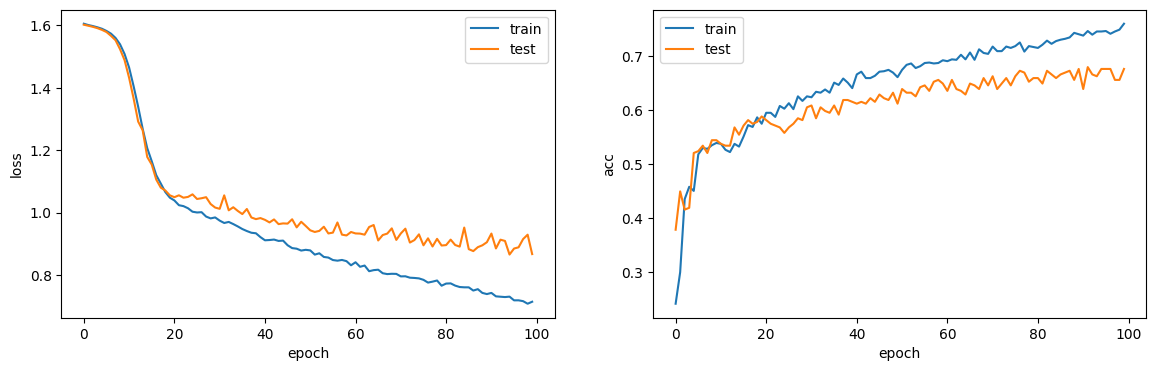

In [ ]:
import matplotlib.pyplot as plt
show_results(model, log)

## Probando el modelo

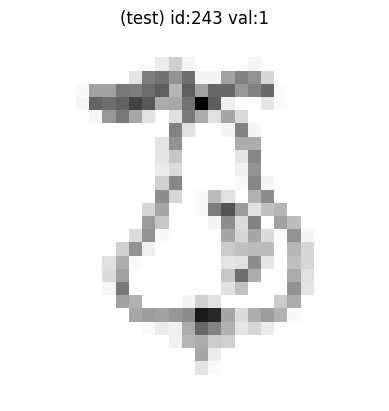

In [ ]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

## Usando el modelo entrenado

In [ ]:
salida = model.predict(im[None,:,:,:])[0]
salida

1/1 [==============================] - 0s 78ms/step


array([2.5512180e-01, 2.2822426e-01, 6.7498453e-04, 1.5240456e-05,
       5.1596367e-01], dtype=float32)

[]

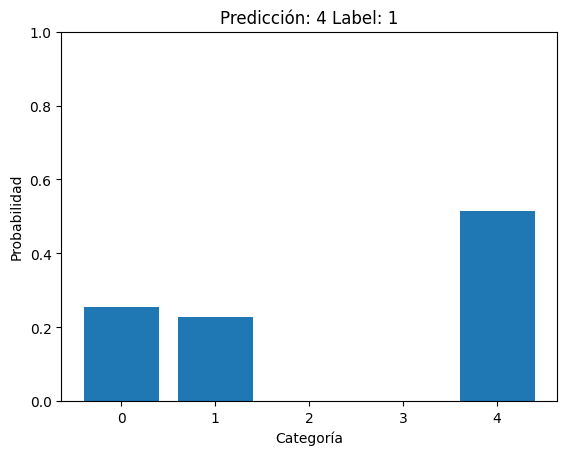

In [ ]:
plt.figure()
plt.title(f"Predicción: {salida.argmax()} Label: {label}")
plt.ylabel("Probabilidad")
plt.xlabel("Categoría")
plt.ylim([0, 1])
plt.bar(np.arange(5), salida)
plt.plot()